#### 영화 리뷰 시각화

##### 단어 토큰화
- I like to eat apples -> 'I' 'like' 'to' 'eat' 'apples' -->
- 나는 사과 먹는 것을 좋아해 -> '나는' '사과' '먹는' '것을' '좋아해' --> 나, 사과, 먹는, 좋아

##### 형태소 분석 라이브러리
- NLPy : 영어 형태소분석 모듈
- KoNLPy : 한국어 형태소분석 모듈

```python
!pip install konlpy
```

In [1]:
!pip install konlpy

In [2]:
# 모듈 설치 확인
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: C:\Program Files\Python311\Lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 


##### 형태소 연습

In [3]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

# 워드클라우드 한글 문제해결
from wordcloud import WordCloud
from PIL import Image, ImageOps

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [4]:
# konlpy import
from konlpy.tag import Okt
import collections

In [5]:
# phrases() - 어구추출 / morphs(text) - 형태소추출
# nouns(text) - 명사만 추출 / pos(text) - 품사정보 추가해서 추출
okt = Okt()

In [6]:
tokens = okt.morphs('나의 드림카는 람보르기니로 꼭 사고 싶어요~!')
tokens

['나', '의', '드림', '카', '는', '람보르기니', '로', '꼭', '사고', '싶어요', '~!']

In [7]:
tokens_tag = okt.pos('나의 드림카는 람보르기니로 꼭 사고 싶어요~!', join=True)
tokens_tag

['나/Noun',
 '의/Josa',
 '드림/Noun',
 '카/Noun',
 '는/Josa',
 '람보르기니/Noun',
 '로/Josa',
 '꼭/Noun',
 '사고/Noun',
 '싶어요/Verb',
 '~!/Punctuation']

In [8]:
tokens_tag = okt.pos('달이 몰락하고 있어', join=False)
tokens_tag

[('달이', 'Noun'), ('몰락하고', 'Adjective'), ('있어', 'Adjective')]

In [9]:
sentence = okt.phrases('나의 드림카는 람보르기니로 꼭 사고 싶어요~!')
sentence

['나의 드림카', '람보르기니', '꼭 사고', '드림', '사고']

In [10]:
sentence = okt.phrases('달이 몰락하고 있어')
sentence

['달이']

In [11]:
nouns = okt.nouns('달이 몰락하고 있어')
nouns

['달이']

In [12]:
text = input()
token_tags = okt.pos(text)
token_tags

[('테스트', 'Noun'), ('입니다', 'Adjective'), ('!', 'Punctuation')]

In [13]:
lyrics = '''좁고 좁은 저 문으로 들어가는 길은 나를 깎고 잘라서 스스로 작아지는 것뿐 이젠 버릴것조차
거의 남은게 없는데 문득 거울을 보니 자존심 하나가 남았네 
두고온 고향 보고픈 얼굴 따뜻한 저녁과 웃음 소리 고갤 흔들어 지워버리며 소리를 듣네 나를 부르는 쉬지말고 가라하는
저 강들이 모여드는 곳 성난 파도 아래 깊이 한 번 만이라도 이를 수 있다면 나 언젠가 심장이 터질 때까지 흐느껴 울고 웃다가
긴 여행을 끝내리 미련없이 
익숙해가는 거친 잠자리도 또 다른 안식을 빚어 그마저 두려울 뿐인데 부끄러운 게으름 자잘한 욕심들아 얼마나 나일 먹어야
마음의 안식을 얻을까 하루 또 하루 무거워지는 고독의 무게를 참는 것은 그보다 힘든 그보다 슬픈 의미도 없이 잊혀지긴 싫은
두려움 때문이지만 
저 강들이 모여 드는 곳 성난 파도 아래 깊이 한 번 만이라도 이를 수 있다면 나 언젠가 심장이 터질 때까지 흐느껴 울고 웃으며
긴 여행을 끝내리 미련없이
아무도 내게 말해 주지 않은 정말로 내가 누군지 알기 위해'''
word_tags = okt.pos(lyrics)

In [14]:
nadj_list = []
for word, tag in word_tags:
    if tag in ['Noun', 'Adjective']: # 품사가 명사, 형용사 만
        nadj_list.append(word)

In [15]:
counts = collections.Counter(nadj_list)
counts.most_common(10)

[('저', 3),
 ('그', 3),
 ('것', 2),
 ('소리', 2),
 ('강', 2),
 ('곳', 2),
 ('파도', 2),
 ('아래', 2),
 ('깊이', 2),
 ('번', 2)]

In [16]:
lyrics = '''내가 미쳤어 정말 미쳤어
너무 미워서 떠나버렸어
너무 쉽게 끝난 사랑
다시 돌아오지 않는단걸 알면서도
미쳤어 내가 미쳤어
그땐 미쳐 널 잡지 못했어
나를 떠떠떠떠떠 떠나 버버버버버 버려
그 짧은 추억만을 남겨둔채로 날
후회했어 니가 가버린뒤
난 더 불행해져 네게 버려진뒤
너를 잃고 싶지않아 줄것이 더 많아 나를 떠나지마라
죽도록 사랑했어 너 하나만을
다시는 볼수없단 미친생각에
눈물만 흐르네 술에 취한밤에 오늘은 잠을 이룰수없어
내가 미쳤어 정말 미쳤어
너무 미워서 떠나버렸어
너무 쉽게 끝난 사랑
다시 돌아오지 않는단걸 알면서도
미쳤어 내가 미쳤어
그땐 미쳐 널 잡지 못했어
나를 떠떠떠떠떠 떠나 버버버버버 버려
그 짧은 추억만을 남겨둔채로 날
사랑이 벌써 식어버린건지
이제와 왜 난 후회하는건지
떠나간자리 혼자남은 난 이렇게 내 가슴은 무너지고
죽도록 사랑했어 너 하나만을
다시는 볼수없단 미친생각에
눈물만 흐르네 술에 취한밤에 오늘은 잠을 이룰수없어
내가 미쳤어 정말 미쳤어
너무 미워서 떠나버렸어
너무 쉽게 끝난 사랑 다시 돌아오지 않는단걸 알면서도
미쳤어 내가 미쳤어
그땐 미쳐 널 잡지 못했어
나를 떠떠떠떠떠 떠나 버버버버버 버려
그 짧은 추억만을 남겨둔채로 날
너의 이런 매일밤 부르는건 들리니? 몹시 아팠나봐 이젠 시작이란 말조차 난겁나 전화기를들어 확인해 니, 떠나줬으면 좋겠어,
내가 미쳤어 정말 미쳤어
너무 미워서 떠나버렸어
너무 쉽게 끝난 사랑 다시 돌아오지 않는단걸 알면서도
미쳤어 내가 미쳤어
그땐 미쳐 널 잡지 못했어
나를 떠떠떠떠떠 떠나 버버버버버 버려
그 짧은 추억만을 남겨둔채로 날'''
word_tags = okt.pos(lyrics)

In [17]:
nadj_list = []
for word, tag in word_tags:
    if tag in ['Noun', 'Adjective']:
        nadj_list.append(word)

In [18]:
counts = collections.Counter(nadj_list)
tags = counts.most_common(20)

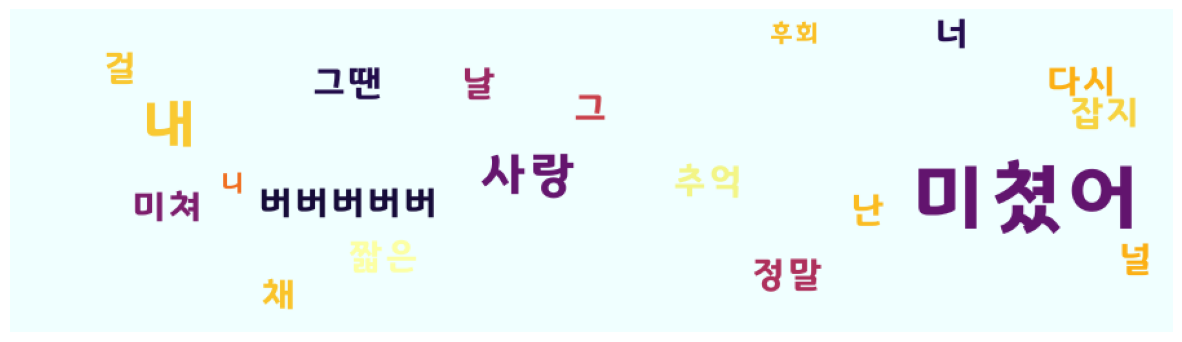

In [19]:
# 워드 클라우드
font_path = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
wc = WordCloud(font_path=font_path, background_color='azure', colormap='inferno', max_font_size=60, 
               width=900, height=250, relative_scaling=0.6)
wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(15, 7))
plt.imshow(wc)
plt.axis('off')
plt.show()

##### 영화리뷰 시각화 시작

In [20]:
df_raw = pd.read_table('./ratings_train.txt')
df_raw

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [21]:
# 데이터 전처리
df_raw['id'].nunique()

150000

In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [23]:
df_raw.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [24]:
# 통계치 내는 예제가 아니기때문에 결측치는 삭제하면 됨
# how : 'all'(모든 컬럼값 NaN이어야지 삭제) 'any'(하나라도 결측치가 있으면 삭제)
df_raw = df_raw.dropna(how='any')

In [25]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [26]:
# 불용어 제거 / 한글, 공백만 두고 나머지 모두 제거 작업
df_raw['document'].str.replace('[가-힣]', '').head(20)

0                                   아 더빙.. 진짜 짜증나네요 목소리
1                     흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                     너무재밓었다그래서보는것을추천한다
3                         교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4     사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
5         막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                 원작의 긴장감을 제대로 살려내지못했다.
7     별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
8                                액션이 없는데도 재미 있는 몇안되는 영화
9         왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
10                                     걍인피니트가짱이다.진짜짱이다♥
11          볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~
12                  울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해
13    담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다...
14    취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어...
15                                     ㄱ냥 매번 긴장되고 재밋음ㅠㅠ
16    참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그...
17                   굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록

In [43]:
from tqdm import tqdm

temp_list = []
df = df_raw['document']

for item in tqdm(df):
    s_list = okt.pos(item)   
   
    for word, tag in s_list:
        if tag in ['Noun', 'Adjective']:
            temp_list.append(word)

100%|██████████| 149995/149995 [16:23<00:00, 152.48it/s]


In [49]:
df_temp_list = pd.DataFrame(temp_list)
df_temp_list.to_csv('./word_lists.csv', encoding='utf-8')